In [ ]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.5 MB/s eta 0:00:00


In [ ]:
# a)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definisanje ulaza i izlaza
hrana = ctrl.Antecedent(np.arange(0, 11, 1), 'hrana')
usluga = ctrl.Antecedent(np.arange(0, 11, 1), 'usluga')
napojnica = ctrl.Consequent(np.arange(0, 26, 1), 'napojnica')

In [ ]:
# b)
# Automatsko dodavanje funkcija pripadnosti
# pomocu automf funkcije (3, 5, ili 7 funkcija pripadnosti)
hrana.automf(3)
usluga.automf(3)

# Rucno pravljenje funkcija pripadnosti
napojnica['mala'] = fuzz.trimf(napojnica.universe, [0, 0, 13])
napojnica['srednja'] = fuzz.trimf(napojnica.universe, [0, 13, 25])
napojnica['velika'] = fuzz.trimf(napojnica.universe, [13, 25, 25])

In [ ]:
# c)
# Definisanje pravila
p1 = ctrl.Rule(hrana['poor'] | usluga['poor'], napojnica['mala'])
p2 = ctrl.Rule(usluga['average'], napojnica['srednja'])
p3 = ctrl.Rule(usluga['good'] | hrana['good'], napojnica['velika'])

In [ ]:
# d)
# Sada se jednostavno moze kreirati sistem upravljanja
sistem = ctrl.ControlSystem([p1, p2, p3])

In [ ]:
# e)
# Kako bi se sistem koristio, mora se prevesti u simulaciju
sistemSim = ctrl.ControlSystemSimulation(sistem)

In [ ]:
# f)
# Sada se moze izvrsiti simulacija:
sistemSim.input['hrana'] = 6.5
sistemSim.input['usluga'] = 9.8

# Sracunaj izlaz iz fuzzy sistema
sistemSim.compute()
print(sistemSim.output['napojnica'])

19.847607361963192


Za hranu ocjene 6.5 i uslugu ocjene 9.8:
Preporučena napojnica je: 41.99%

Članske funkcije za 'hrana':


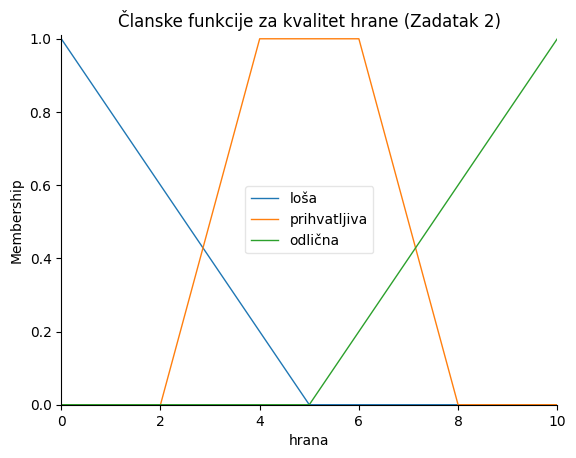


Članske funkcije za 'usluga':


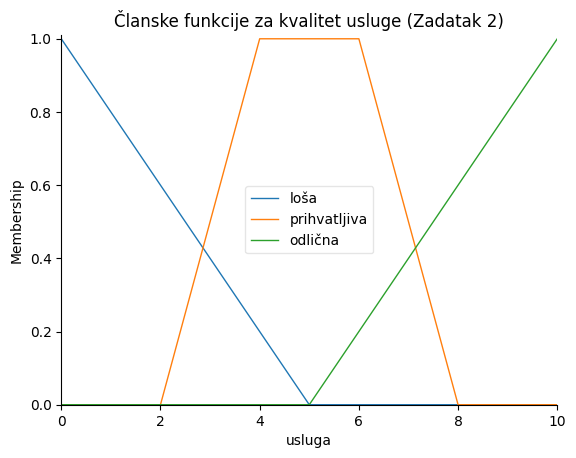


Članske funkcije za 'napojnica':


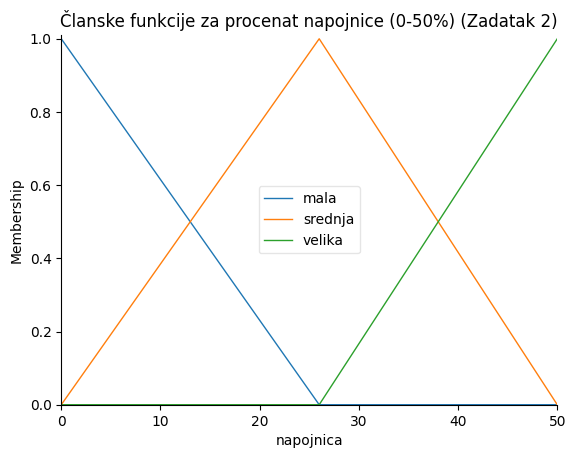


Vizualizacija rezultata za date ulaze:


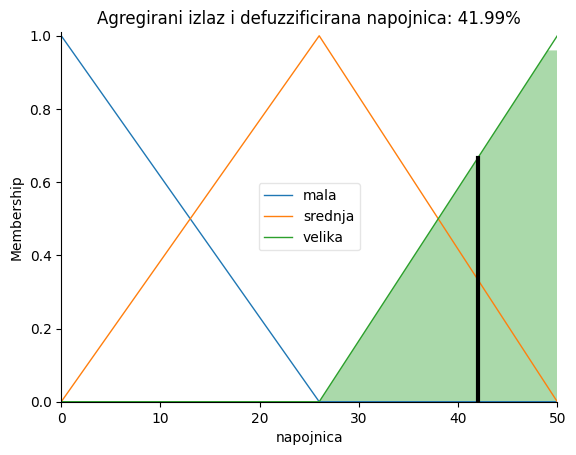


Test: Hrana=1.0, Usluga=1.5 -> Napojnica: 9.27%
Test: Hrana=2.0, Usluga=5.0 -> Napojnica: 25.33%
Test: Hrana=9.0, Usluga=6.0 -> Napojnica: 29.03%


In [ ]:
# Zadatak 2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# a) Definisanje ulaza i izlaza
# Univerzum za ulaze (hrana, usluga) je od 0 do 10.
# Univerzum za izlaz (napojnica) je sada od 0 do 50%.
hrana_universe = np.arange(0, 11, 1)
usluga_universe = np.arange(0, 11, 1)
napojnica_universe = np.arange(0, 51, 1) # Promjena: maksimalna napojnica 50%

hrana = ctrl.Antecedent(hrana_universe, 'hrana')
usluga = ctrl.Antecedent(usluga_universe, 'usluga')
napojnica = ctrl.Consequent(napojnica_universe, 'napojnica')

# b) Ručno definisanje funkcija pripadnosti za ulaze i izlaz
# Ne koristi se automf.

# Za ulaze 'hrana' i 'usluga':
# 'loša' (trougaona), 'prihvatljiva' (trapezoidna), 'odlična' (trougaona)

# Hrana
hrana['loša'] = fuzz.trimf(hrana.universe, [0, 0, 5])
hrana['prihvatljiva'] = fuzz.trapmf(hrana.universe, [2, 4, 6, 8])
hrana['odlična'] = fuzz.trimf(hrana.universe, [5, 10, 10])

# Usluga (iste funkcije kao za hranu)
usluga['loša'] = fuzz.trimf(usluga.universe, [0, 0, 5])
usluga['prihvatljiva'] = fuzz.trapmf(usluga.universe, [2, 4, 6, 8])
usluga['odlična'] = fuzz.trimf(usluga.universe, [5, 10, 10])

# Za izlaz 'napojnica' (trougaone funkcije, prilagođene opsegu 0-50%)
napojnica['mala'] = fuzz.trimf(napojnica.universe, [0, 0, 26])
napojnica['srednja'] = fuzz.trimf(napojnica.universe, [0, 26, 50])
napojnica['velika'] = fuzz.trimf(napojnica.universe, [26, 50, 50])

# c) Definisanje pravila
p1 = ctrl.Rule(usluga['odlična'] | hrana['odlična'], napojnica['velika'])
p2 = ctrl.Rule(usluga['prihvatljiva'], napojnica['srednja'])
p3 = ctrl.Rule(usluga['loša'] & hrana['loša'], napojnica['mala'])

# d) Kreiranje sistema upravljanja
sistem = ctrl.ControlSystem([p1, p2, p3])

# e) Kreiranje simulacije sistema
sistemSim = ctrl.ControlSystemSimulation(sistem)

# f) Izvršavanje simulacije sa zadatim crisp ulazima
# Čuvamo ulazne vrijednosti u varijable
hrana_input_val = 6.5
usluga_input_val = 9.8

sistemSim.input['hrana'] = hrana_input_val
sistemSim.input['usluga'] = usluga_input_val

# Sračunaj izlaz iz fuzzy sistema
sistemSim.compute()

rezultat_napojnice = sistemSim.output['napojnica']

# ISPRAVLJEN PRINT: Koristimo sačuvane varijable za ulazne vrijednosti
print(f"Za hranu ocjene {hrana_input_val} i uslugu ocjene {usluga_input_val}:")
print(f"Preporučena napojnica je: {rezultat_napojnice:.2f}%")

# Vizualizacija (opcionalno, za bolji uvid)

print("\nČlanske funkcije za 'hrana':")
hrana.view()
plt.title("Članske funkcije za kvalitet hrane (Zadatak 2)")
plt.show()

print("\nČlanske funkcije za 'usluga':")
usluga.view()
plt.title("Članske funkcije za kvalitet usluge (Zadatak 2)")
plt.show()

print("\nČlanske funkcije za 'napojnica':")
napojnica.view()
plt.title("Članske funkcije za procenat napojnice (0-50%) (Zadatak 2)")
plt.show()

print("\nVizualizacija rezultata za date ulaze:")
napojnica.view(sim=sistemSim)
plt.title(f"Agregirani izlaz i defuzzificirana napojnica: {rezultat_napojnice:.2f}%")
plt.show()

# Testiranje sa drugim vrijednostima da vidimo ponašanje sistema

# Primjer: Loša hrana i loša usluga
hrana_test1 = 1.0
usluga_test1 = 1.5
sistemSim.input['hrana'] = hrana_test1
sistemSim.input['usluga'] = usluga_test1
sistemSim.compute()
# ISPRAVLJEN PRINT
print(f"\nTest: Hrana={hrana_test1}, Usluga={usluga_test1} -> Napojnica: {sistemSim.output['napojnica']:.2f}%")

# Primjer: Prihvatljiva usluga, loša hrana
hrana_test2 = 2.0
usluga_test2 = 5.0
sistemSim.input['hrana'] = hrana_test2
sistemSim.input['usluga'] = usluga_test2
sistemSim.compute()
# ISPRAVLJEN PRINT
print(f"Test: Hrana={hrana_test2}, Usluga={usluga_test2} -> Napojnica: {sistemSim.output['napojnica']:.2f}%")

# Primjer: Odlična hrana, prihvatljiva usluga
hrana_test3 = 9.0
usluga_test3 = 6.0
sistemSim.input['hrana'] = hrana_test3
sistemSim.input['usluga'] = usluga_test3
sistemSim.compute()
# ISPRAVLJEN PRINT
print(f"Test: Hrana={hrana_test3}, Usluga={usluga_test3} -> Napojnica: {sistemSim.output['napojnica']:.2f}%")